Optimized Parameters:
Oxygen Content (O2): 5.00%
Flue Gas Temperature (T_fg): 150.00°C
Unburnt Carbon (U_C): 0.50%
Maximized Boiler Efficiency: 98.10%


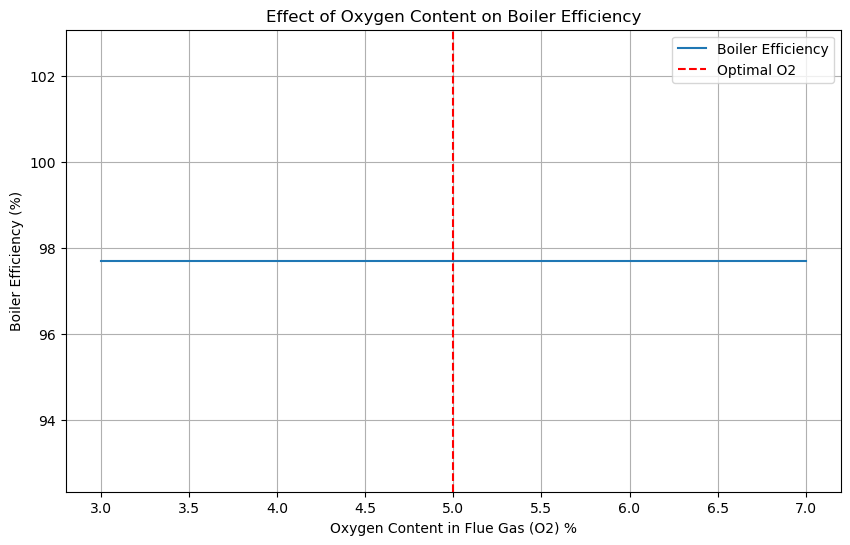

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
K1 = 0.5
K2 = 0.8
K3 = 1.5
GCV = 25000  # Gross Calorific Value in kJ/kg
T_ambient = 30  # Ambient temperature in °C

# Boiler efficiency equation
def boiler_efficiency(params):
    O2, T_fg, U_C = params
    L_dry_flue_gas = K1 * (T_fg - T_ambient) / GCV
    L_unburnt_carbon = K2 * U_C
    L_radiation = K3
    efficiency = 100 - (L_dry_flue_gas + L_unburnt_carbon + L_radiation)
    return -efficiency  # Negative for minimization

# Constraints and bounds
bounds = [(3, 7), (120, 180), (0.5, 1.5)]  # Bounds for O2, T_fg, and U_C
constraints = [
    {"type": "ineq", "fun": lambda x: x[0] - 3},  # O2 >= 3%
    {"type": "ineq", "fun": lambda x: 7 - x[0]},  # O2 <= 7%
]

# Initial guess
initial_guess = [5, 150, 1.0]

# Optimization
result = minimize(boiler_efficiency, initial_guess, bounds=bounds, constraints=constraints)

# Extract results
optimized_params = result.x
optimized_efficiency = -result.fun

# Output results
print("Optimized Parameters:")
print(f"Oxygen Content (O2): {optimized_params[0]:.2f}%")
print(f"Flue Gas Temperature (T_fg): {optimized_params[1]:.2f}°C")
print(f"Unburnt Carbon (U_C): {optimized_params[2]:.2f}%")
print(f"Maximized Boiler Efficiency: {optimized_efficiency:.2f}%")

# Visualization
O2_values = np.linspace(3, 7, 50)
efficiency_values = [
    -boiler_efficiency([O2, 150, 1.0]) for O2 in O2_values
]

plt.figure(figsize=(10, 6))
plt.plot(O2_values, efficiency_values, label="Boiler Efficiency")
plt.axvline(optimized_params[0], color="r", linestyle="--", label="Optimal O2")
plt.xlabel("Oxygen Content in Flue Gas (O2) %")
plt.ylabel("Boiler Efficiency (%)")
plt.title("Effect of Oxygen Content on Boiler Efficiency")
plt.legend()
plt.grid()
plt.show()
